## Step 1: Acquire Data

### Explore Problem
- Find 3 or 5 Descriptive Analytics that might be useful to be known (find 3 or 5 trends that happened in dataset)
- Try to show Diagnostic Analytics to clarify some trend in Descriptive Analytics

#### 1. Descriptive Analytics
- Siapa User ID yang paling banyak melakukan transaksi ?
- Bagaimana tren transaksi yang terjadi ?
- Bagainmana tren diskon yang terjadi ?
- Kapan (Pada jam berapa) transaksi paling banyak (paling tinggi) biasanya terjadi?
- Kapan (Pada hari apa) diskon paling banyak (paling tinggi) biasanya terjadi ?
- Promo kode apa yang paling sering digunakan? Promo kode apa yang paling sering (paling banyak) digunakan secara bersamaan?
- Bagaimana pesebaran level user yang terjadi ? (level user apa yang paling banyak melakukan transaksi ?)

#### 2. Diagnostic Analytics
- Bagaimana hubungan tren transaksi dengan tren diskon yang terjadi dalam Dataset ?
- Bagaimana hubungan tren level user dengan payment amount dan discount amount dalam dataset ?
- Bagaimana sebaran jenis transaksi yang terjadi berdasarkan kategorinya ?
- Bagaimana hubungan antara Promo kode dengan total diskon yang didapatkan ?

### Identify Data
- The data that will be use is from ```payment.csv``` and ```discount.csv``` dataset
- Table payment has 7 columns, following:
    - <b>transcation_payment_id</b> : PK (Primary Key) and Unique ID of the event in the table payment
    - <b>transaction_id</b> : FK (Foreign Key) and order number of transaction
    - <b>user_id</b> : Customer number
    - <b>Payment_source</b> : Payment source code
    - <b>Payment_amount</b> : Amount of each transaction
    - <b>Transaction_date</b> : Date of transcation happened
    - <b>level_user</b> : level of the member
- Table discount has 5 columns, following:
    - <b>Transcation_discount_id</b> : PK (Primary Key) and unique id of the event in table discount
    - <b>transaction_id</b> : FK (Foreign Key) and order number of transaction
    - <b>Discount_amount</b> : The value of the discount
    - <b>Redeem_Date</b>
    - <b>Promo_code</b> : Code of promotion
    
### Import Libraries and Dataset

In [1]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Times New Roman'

#### 1. Import Table Payment and Discount

In [2]:
datapayment = pd.read_csv('payment.csv')
datadiscount = pd.read_csv('discount.csv')

#### 2. Read Table Payment and Discount into DataFrame

In [3]:
datapayment.head()

,Transaction_payment_id,Transaction_id,Payment_source,Payment_Amount,Transaction_date,User_id,Level_user
0,00000D89-BAD2-5628-A65B-3C8F4397F047,3DB5E42B-9CD4-45E0-9AAB-35054CCF3955,1,55600.0,5/9/22 11:24,7fd36377-d59f-11e8-93d5-0242ac110006,3
1,000023A4-AE30-524E-8851-ECF2D6EA9493,582DCDA7-629E-4E84-9225-601BBE030C29,1,111000.0,5/15/22 13:05,7beaabd8-067e-11e9-8159-9802e614fb2e,3
2,0000A337-8DE9-5B9D-888C-3750620C96D9,09C589E8-0D3F-4E1F-91C3-AA4E6BD6CDA5,1,18000.0,5/6/22 13:33,81c9534c-d59e-11e8-93d5-0242ac110006,3
3,0000CB3B-4246-5A58-AA16-FF20B9AC60A8,66EFF64F-6E22-4F97-8AE0-6316D441E10A,1,0.0,5/28/22 10:55,07c1dd4f-d59c-11e8-93d5-0242ac110006,3
4,0000D25D-4770-57AF-B86A-FB20EC1082D1,47B50A2D-C5B6-4407-9D08-E917393BA7AC,1,69000.0,5/25/22 13:41,6307e038-b95d-11eb-9ac5-492edff4d4a6,3


In [4]:
datadiscount.head()

,Transaction_discount_id,Transaction_id,Promo_code,Discount_Amount,Redeem_Date
0,38E4402B-4021-52F1-831D-3A2EA42EF398,75F26B46-4BC2-47EB-87C9-80CCC0193C05,1219.0,57000,5/28/22 10:16
1,1EE712BC-74A9-5071-A38A-98FF84CAFE20,9E12690D-29D0-4D6B-B021-CAEFA6E88917,1086.0,59000,5/28/22 15:08
2,5BED729C-FD54-55D4-AA8A-2C89C2023A20,04F1C84E-8467-4BB8-99D0-C2F20E60762C,9001.0,51000,5/28/22 16:11
3,2F3DDB2D-AC0C-57E4-9896-DB2DF84F6E0F,D2D5F105-962A-4EEF-A6CA-C1961C46071F,9214.0,0,5/28/22 16:12
4,95D02797-CDE3-5DB8-B331-6F170B02D9CB,D2D5F105-962A-4EEF-A6CA-C1961C46071F,9214.0,55000,5/28/22 16:12


#### 3. Show initial shape of Payment and Discount dataset

In [5]:
datapayment.shape

(972403, 7)

In [6]:
datadiscount.shape

(705742, 5)

- <b>Payment</b> dataset has 972,403 entry of rows and 7 columns
- <b>Discount</b> dataset has 705,742 entry of rows and 5 columns
- To simplify our dataset try to merge Payment and Discount into one DataFrame

#### 4. Join Table Payment and Discount into 1 DataFrame

In [7]:
query = "SELECT T1.*, T2.* FROM datapayment T1 INNER JOIN datadiscount T2 ON T1.Transaction_id = T2.Transaction_id"
all_data = ps.sqldf(query)
all_data.head()

,Transaction_payment_id,Transaction_id,Payment_source,Payment_Amount,Transaction_date,User_id,Level_user,Transaction_discount_id,Transaction_id,Promo_code,Discount_Amount,Redeem_Date
0,00000D89-BAD2-5628-A65B-3C8F4397F047,3DB5E42B-9CD4-45E0-9AAB-35054CCF3955,1,55600.0,5/9/22 11:24,7fd36377-d59f-11e8-93d5-0242ac110006,3,154F720B-9862-5D32-888C-084EA80F2D0E,3DB5E42B-9CD4-45E0-9AAB-35054CCF3955,9001.0,12400,5/9/22 11:24
1,000023A4-AE30-524E-8851-ECF2D6EA9493,582DCDA7-629E-4E84-9225-601BBE030C29,1,111000.0,5/15/22 13:05,7beaabd8-067e-11e9-8159-9802e614fb2e,3,8AF4E681-B001-5284-B71C-D814D6389879,582DCDA7-629E-4E84-9225-601BBE030C29,1017.0,2,5/15/22 13:05
2,0000A337-8DE9-5B9D-888C-3750620C96D9,09C589E8-0D3F-4E1F-91C3-AA4E6BD6CDA5,1,18000.0,5/6/22 13:33,81c9534c-d59e-11e8-93d5-0242ac110006,3,E0B0B605-07F3-5301-A812-65124143B78C,09C589E8-0D3F-4E1F-91C3-AA4E6BD6CDA5,9001.0,59000,5/6/22 13:33
3,0000CB3B-4246-5A58-AA16-FF20B9AC60A8,66EFF64F-6E22-4F97-8AE0-6316D441E10A,1,0.0,5/28/22 10:55,07c1dd4f-d59c-11e8-93d5-0242ac110006,3,98EF667A-FFAE-524E-B121-0EBF33067EFB,66EFF64F-6E22-4F97-8AE0-6316D441E10A,9001.0,53000,5/28/22 10:55
4,0000EED4-7E0E-5F21-BABC-357D89CB040A,7774F5E7-4A60-49A9-A359-BD3C167D8F29,2,9000.0,5/15/22 16:25,e63f0d4a-f424-11ea-967b-f9b86ba0bcee,2,493EBB76-C3F2-5D80-9033-4167F04FEB12,7774F5E7-4A60-49A9-A359-BD3C167D8F29,9001.0,20000,5/15/22 16:25


In [8]:
all_data.shape

(767776, 12)

- The dataset now has 767,776 entry of rows and 12 columns

#### 5. Check the columns name and statistics of the data

In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767776 entries, 0 to 767775
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Transaction_payment_id   767776 non-null  object 
 1   Transaction_id           767776 non-null  object 
 2   Payment_source           767776 non-null  object 
 3   Payment_Amount           767776 non-null  float64
 4   Transaction_date         767776 non-null  object 
 5   User_id                  767769 non-null  object 
 6   Level_user               767776 non-null  int64  
 7   Transaction_discount_id  767776 non-null  object 
 8   Transaction_id           767776 non-null  object 
 9   Promo_code               766113 non-null  float64
 10  Discount_Amount          767776 non-null  int64  
 11  Redeem_Date              767776 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 70.3+ MB


```NOTE```
- There are 12 columns, 8 columns are object and 4 columns are numeric (```float64``` and ```int64```)
- We also get know there are some missing values in column ```User_id``` and ```Promo_code```

In [10]:
all_data.describe()

,Payment_Amount,Level_user,Promo_code,Discount_Amount
count,7.677760e+05,767776.000000,766113.000000,7.677760e+05
mean,6.635567e+04,2.726786,5984.078749,3.360958e+04
std,9.054533e+04,0.537973,3852.861257,4.099339e+04
min,-6.930000e+05,1.000000,1.000000,0.000000e+00
25%,1.900000e+04,3.000000,1220.000000,5.500000e+03
50%,5.850000e+04,3.000000,9001.000000,3.100000e+04
75%,9.200000e+04,3.000000,9001.000000,5.600000e+04
max,1.255000e+07,3.000000,9214.000000,3.269000e+06


```NOTE```
- Since we only had 4 columns that contain numeric data, It seems that we don't really need complicated considerations and calculations to process the numerical data
- We get to know that the mean of payment is around 6,635 (we still don't know what currency is using on this dataset)
- We get to know that the maximum (highest) payment is around 12,550,000 and maximum (highest) discount is around 3,269,000
- There are some peculiar in minimum value of Payment Amount, it show negative value of payment

## Step 2: Prepare Data

### Explore Data

#### 1. Check if there any missing values

In [11]:
all_data.isnull().any()

Transaction_payment_id     False
Transaction_id             False
Payment_source             False
Payment_Amount             False
Transaction_date           False
User_id                     True
Level_user                 False
Transaction_discount_id    False
Transaction_id             False
Promo_code                  True
Discount_Amount            False
Redeem_Date                False
dtype: bool

In [12]:
all_data.isnull().sum()

Transaction_payment_id        0
Transaction_id                0
Payment_source                0
Payment_Amount                0
Transaction_date              0
User_id                       7
Level_user                    0
Transaction_discount_id       0
Transaction_id                0
Promo_code                 1663
Discount_Amount               0
Redeem_Date                   0
dtype: int64

- There are 7 missing values in column ```User_id```
- There are 1663 missing values in column ```Promo_code```

### Data Cleansing

#### 1. Find column that contain missing values or NaN

In [14]:
nan_data = all_data[all_data.isna().any(axis=1)]
display(nan_data.head())

,Transaction_payment_id,Transaction_id,Payment_source,Payment_Amount,Transaction_date,User_id,Level_user,Transaction_discount_id,Transaction_id,Promo_code,Discount_Amount,Redeem_Date
24,00096DCD-6497-55C7-AD5D-C317821B75E3,3A709E85-8B27-4A9C-83FB-D0BEE292F4CF,SSC5D165164471954SC5D-002-0,96000.0,5/4/22 13:14,8dc2b582-d59f-11e8-93d5-0242ac110006,3,A6793A8E-3009-5F54-9105-440048100698,3A709E85-8B27-4A9C-83FB-D0BEE292F4CF,NaN,8000,5/4/22 13:14
1184,01030FA0-CEA9-541A-876A-B2BDA5B549C3,921DC4A2-8534-45CE-A05B-A0585C851267,SSC5D165197582150SC5D-002-0,35200.0,5/8/22 9:13,b57a34f1-d59b-11e8-93d5-0242ac110006,3,FDF0ABD9-5A09-5B65-8570-B01B6382133D,921DC4A2-8534-45CE-A05B-A0585C851267,NaN,8800,5/8/22 9:13
1926,003F6CF4-274B-5976-BB91-F6B6EA6D2F45,28D4554C-AF79-4550-BC8D-3D1B13581B89,SSCM1165140397417SCM1-002-0,64000.0,5/1/22 18:22,fd08861f-d5a1-11e8-93d5-0242ac110006,3,6896C80F-602E-5D86-A03E-8E6C5CFF221F,28D4554C-AF79-4550-BC8D-3D1B13581B89,NaN,6000,5/1/22 18:22
2341,006D97BF-37C4-566E-808F-E5E5F93168F2,8FDA8206-88AF-4743-9B22-6F45B192FEDF,4630,54000.0,5/10/22 12:29,c4968320-d59c-11e8-93d5-0242ac110006,3,A9F108F1-000B-5D24-9424-FEFEEEF03F3E,8FDA8206-88AF-4743-9B22-6F45B192FEDF,NaN,10000,5/10/22 12:29
2362,01F8748C-8B37-5E5E-B8DE-1A7C1CE966E8,FB6A4FED-9898-417C-AEB2-F344A61A7AC9,SSC2J165347680170SC2J-004-0,62000.0,5/25/22 18:07,72577e24-7c77-11e9-9061-4f8848f374c0,3,04757B53-2930-5075-816A-E9E5E24BEFAC,FB6A4FED-9898-417C-AEB2-F344A61A7AC9,NaN,40000,5/25/22 18:07


#### 2. Drow rows or column that contain missing values (NaN)

In [15]:
all_data = all_data.dropna()
all_data.reset_index(drop=True)
all_data.shape

(766106, 12)

- Data shape after cleansing has 766,106 entry of rows and 12 columns 

### Transforming Data
#### 1. Remove duplicate column

In [16]:
all_data = all_data.loc[:,~all_data.columns.duplicated()].copy()

#### 2. Reindex the column name with desired order


In [17]:
all_data = all_data.reindex(columns=['User_id', 'Transaction_id', 'Transaction_payment_id', 'Transaction_discount_id', 'Transaction_date', 'Redeem_Date', 'Payment_Amount', 'Discount_Amount', 'Payment_source', 'Level_user', 'Promo_code'])

#### 3. Change column data type to correct type

In [18]:
all_data['Promo_code'] = all_data['Promo_code'].round(0)
all_data['Promo_code'] = all_data['Promo_code'].astype(int)
all_data['Discount_Amount'] = all_data['Discount_Amount'].astype(float)

#### 4. Augmented dataset with additional column

In [19]:
all_data['Month'] = pd.to_datetime(all_data['Transaction_date']).dt.month
all_data['Day'] = pd.to_datetime(all_data['Transaction_date']).dt.day
all_data['Hour'] = pd.to_datetime(all_data['Transaction_date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Transaction_date']).dt.minute
all_data['Count'] = 1

#### 5. Inspect value on specific columns
- This used to get an ideas what analysis can be done
- At this step i want to inspect some columns, following:
    - ```Promo code```
    - ```Level user```
    - ```Month```
    - ```Day```
    - ```Hour```

In [20]:
all_data['Promo_code'].unique()

array([9001, 1017, 1045, 1220, 1029, 9208, 1086, 9040, 9113, 9214, 9201,
       9189, 9207, 1219, 2068, 9206, 1222,   21, 1248,   46, 9130, 1238,
          1, 1059, 9167, 9186, 9114, 9131, 1163,   24, 1085,   55, 9177,
       9120, 1199, 1057, 6046, 9124, 1200,   66, 9188, 1209,   94,   84,
         82,   49, 1061, 9192,   98, 1058,   54, 9190, 6050,  106,   29,
       1039, 1249, 2061, 9191, 1034, 9205, 9165,   72,   41, 1006,    4,
       1007,   47,  100,   79, 3003,   42,   96, 9116])

In [21]:
all_data['Promo_code'].nunique()

74

- There are 74 unique of Promo code

In [22]:
all_data['Level_user'].unique()

array([3, 2, 1], dtype=int64)

- There are 3 type of level user, which following:
    - User level 1
    - User level 2
    - User level 3

In [24]:
all_data['Month'].unique()

array([5], dtype=int64)

- There only 1 value in column Month : 5
- 5 Represent the month : Mei
- From now on we get to know that the dataset is only contain Data Transaction on Mei 2022

In [25]:
all_data['Day'].unique()

array([ 9, 15,  6, 28,  7, 19, 16, 12,  8, 18, 27,  5, 22, 31,  3, 17, 13,
       26,  2, 20, 24, 11, 25, 21, 30,  1, 29, 10,  4, 23, 14],
      dtype=int64)

In [26]:
all_data['Day'].nunique()

31

- There are 31 Days in Day column

In [28]:
all_data['Hour'].unique()

array([11, 13, 10, 16, 15,  9, 17, 14,  8, 21,  7, 20, 19, 12, 18,  6, 22,
        4,  5, 23,  0,  3,  2,  1], dtype=int64)

- There are 23 time stamp (in hours) which represent an hour in a day

```NOTE```
- From the data reading above we get to know that there are 74 unique code of promo code that can be use by user (customer)
- There are 3 type level of customer: level 1, level 2, level 3
- The dataset are the transaction data from Mei 2022

## Step 3: Analyze Data
### 1. Descriptive Analytics
- Siapa User ID yang paling banyak melakukan transaksi selama bulan Mei 2022 ?
- Bagaimana tren transaksi yang terjadi pada bulan Mei 2022 ?
- Bagainmana tren diskon yang terjadi pada bulan Mei 2022 ?
- Kapan (Pada jam berapa) transaksi paling banyak (paling tinggi) biasanya terjadi?
- Kapan (Pada hari apa) diskon paling banyak (paling tinggi) biasanya terjadi ?
- Promo kode apa yang paling sering digunakan? Promo kode apa yang paling sering (paling banyak) digunakan secara bersamaan?
- Bagaimana pesebaran level user yang terjadi di bulan Mei 2022? (level user apa yang paling banyak melakukan transaksi ?)

#### Try to see what final dataset will be use to analyze

In [29]:
all_data.head()

,User_id,Transaction_id,Transaction_payment_id,Transaction_discount_id,Transaction_date,Redeem_Date,Payment_Amount,Discount_Amount,Payment_source,Level_user,Promo_code,Month,Day,Hour,Minute,Count
0,7fd36377-d59f-11e8-93d5-0242ac110006,3DB5E42B-9CD4-45E0-9AAB-35054CCF3955,00000D89-BAD2-5628-A65B-3C8F4397F047,154F720B-9862-5D32-888C-084EA80F2D0E,5/9/22 11:24,5/9/22 11:24,55600.0,12400.0,1,3,9001,5,9,11,24,1
1,7beaabd8-067e-11e9-8159-9802e614fb2e,582DCDA7-629E-4E84-9225-601BBE030C29,000023A4-AE30-524E-8851-ECF2D6EA9493,8AF4E681-B001-5284-B71C-D814D6389879,5/15/22 13:05,5/15/22 13:05,111000.0,2.0,1,3,1017,5,15,13,5,1
2,81c9534c-d59e-11e8-93d5-0242ac110006,09C589E8-0D3F-4E1F-91C3-AA4E6BD6CDA5,0000A337-8DE9-5B9D-888C-3750620C96D9,E0B0B605-07F3-5301-A812-65124143B78C,5/6/22 13:33,5/6/22 13:33,18000.0,59000.0,1,3,9001,5,6,13,33,1
3,07c1dd4f-d59c-11e8-93d5-0242ac110006,66EFF64F-6E22-4F97-8AE0-6316D441E10A,0000CB3B-4246-5A58-AA16-FF20B9AC60A8,98EF667A-FFAE-524E-B121-0EBF33067EFB,5/28/22 10:55,5/28/22 10:55,0.0,53000.0,1,3,9001,5,28,10,55,1
4,e63f0d4a-f424-11ea-967b-f9b86ba0bcee,7774F5E7-4A60-49A9-A359-BD3C167D8F29,0000EED4-7E0E-5F21-BABC-357D89CB040A,493EBB76-C3F2-5D80-9033-4167F04FEB12,5/15/22 16:25,5/15/22 16:25,9000.0,20000.0,2,2,9001,5,15,16,25,1


#### 1.a. Siapa User ID yang paling banyak melakukan transaksi selama bulan Mei 2022

In [31]:
dfby_userid = all_data.groupby(['User_id'])[['Transaction_id', 'Count']].count()
dfby_userid = dfby_userid.sort_values(by='Count', ascending=False)
dfby_userid.head(10)

,Transaction_id,Count
User_id,,
393e56ca-d59c-11e8-93d5-0242ac110006,173,173
4a1a4ce0-d59d-11e8-93d5-0242ac110006,149,149
3e969498-a949-11eb-99f8-19dab282eff0,145,145
6ed37e54-a078-11e9-9ba9-44e6a2319fc4,136,136
b7f4220d-d5a0-11e8-93d5-0242ac110006,117,117
f24f5d6d-d602-11e8-93d5-0242ac110006,108,108
ed3879b0-ed0f-11e8-80bd-211279122f24,107,107
033805d5-d606-11e8-93d5-0242ac110006,105,105
e4dede7c-4455-11eb-930f-20409cc2b71e,105,105


<AxesSubplot:title={'center':'User ID Makes the Most Transaction in May 2022'}, xlabel='User_id'>

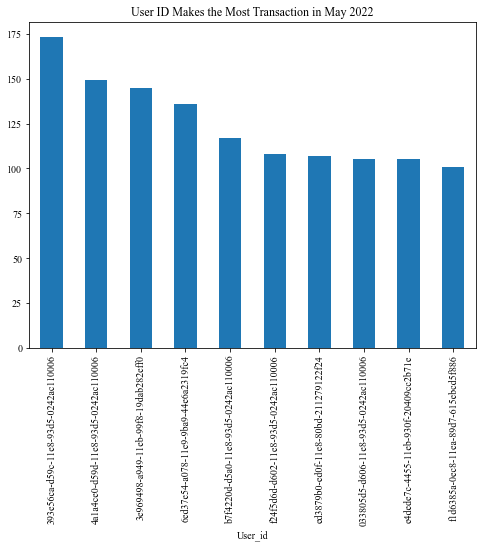

In [32]:
dfby_userid['Transaction_id'].head(10).plot.bar(figsize=(8,6), title='User ID Makes the Most Transaction in May 2022')

```NOTE```
- From the picture above we get to know 10 User id of customer with the most transaction in May 2022:
    1. User ID : ```393e56ca-d59c-11e8-93d5-0242ac110006``` with total 173 Transaction
    2. User ID : ```4a1a4ce0-d59d-11e8-93d5-0242ac110006``` with total 149 Transaction	
    3. User ID : ```3e969498-a949-11eb-99f8-19dab282eff0``` with total 145 Transaction
    4. User ID : ```6ed37e54-a078-11e9-9ba9-44e6a2319fc4``` with total 136 Transaction	
    5. User ID : ```b7f4220d-d5a0-11e8-93d5-0242ac110006``` with total 117 Transaction	
    6. User ID : ```f24f5d6d-d602-11e8-93d5-0242ac110006``` with total 108 Transaction	
    7. User ID : ```ed3879b0-ed0f-11e8-80bd-211279122f24``` with total 107 Transaction	
    8. User ID : ```033805d5-d606-11e8-93d5-0242ac110006``` with total 105 Transaction	
    9. User ID : ```e4dede7c-4455-11eb-930f-20409cc2b71e``` with total 105 Transaction	
    10. User ID : ```f1d6385a-0ec8-11ea-89d7-615ebcd5f886``` with total 101 Transaction	

#### 1.b. Bagaimana tren transaksi yang terjadi pada Bulan Mei 2022

In [33]:
dfby_day = all_data.groupby(['Day'])[['Payment_Amount', 'Discount_Amount']].sum()
dfby_day

,Payment_Amount,Discount_Amount
Day,,
1,2.005486e+09,9.722573e+08
2,1.449088e+09,8.578376e+08
3,1.392535e+09,7.903155e+08
4,1.326885e+09,7.876371e+08
5,2.083113e+09,1.164340e+09
6,1.464113e+09,7.802771e+08
7,1.281509e+09,7.236355e+08
8,1.328708e+09,7.029821e+08
9,1.074221e+09,6.178499e+08


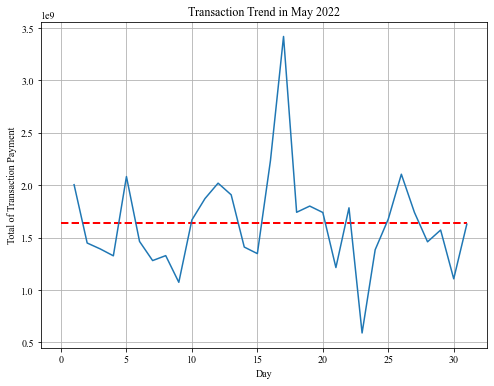

In [41]:
ax = dfby_day['Payment_Amount'].plot(figsize=(8,6), title='Transaction Trend in May 2022', ylabel='Total of Transaction Payment')
ax.hlines(y=dfby_day['Payment_Amount'].mean(), xmin=0, xmax=len(dfby_day['Payment_Amount']), linestyles='--', lw=2, colors='red')
ax.grid(True)

In [44]:
dfby_day[dfby_day['Payment_Amount'] > dfby_day['Payment_Amount'].mean()].sort_values(by='Payment_Amount', ascending=False)

,Payment_Amount,Discount_Amount
Day,,
17,3.419684e+09,1.157410e+09
16,2.234974e+09,8.961951e+08
26,2.105346e+09,1.307586e+09
5,2.083113e+09,1.164340e+09
12,2.020125e+09,1.135971e+09
1,2.005486e+09,9.722573e+08
13,1.908941e+09,9.490776e+08
11,1.873095e+09,9.256054e+08
19,1.801469e+09,1.052815e+09


```NOTE```
- From the picture above we know that most transaction happened on 17 May 2022 and least transaction happened on 23 May 2022
- The horizontal red line show an average of Payment Transaction on May 2022
- We also get to know there some days that had Payment Transaction Amount above the average, those are (from 5 highest):
    - Day 17 with total amount of Payment Transaction around 3.4196 Billion
    - Day 16 with total amount of Payment Transaction around 2.23497 Billion
    - Day 26 with total amount of Payment Transaction around 2.10534 Billion
    - Day 5 with total amount of Payment Transaction around 2.08311 Billion
    - Day 12 with total amount of Payment Transactin around 2.02012 Billion

#### 1.c Bagaimana trend diskon yang terjadi pada bulan Mei 2022

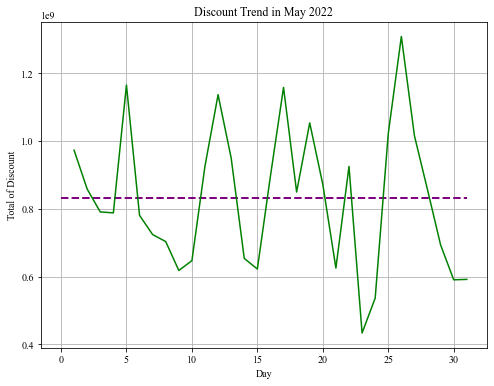

In [47]:
ax = dfby_day['Discount_Amount'].plot(figsize=(8,6), title='Discount Trend in May 2022', ylabel='Total of Discount', color='green')
ax.hlines(y=dfby_day['Discount_Amount'].mean(), xmin=0, xmax=len(dfby_day['Discount_Amount']), linestyles='--', lw=2, colors='purple')
ax.grid(True)

In [49]:
dfby_day[dfby_day['Discount_Amount'] > dfby_day['Discount_Amount'].mean()].sort_values(by='Discount_Amount', ascending=False)

,Payment_Amount,Discount_Amount
Day,,
26,2.105346e+09,1.307586e+09
5,2.083113e+09,1.164340e+09
17,3.419684e+09,1.157410e+09
12,2.020125e+09,1.135971e+09
19,1.801469e+09,1.052815e+09
25,1.677150e+09,1.020945e+09
27,1.740971e+09,1.014776e+09
1,2.005486e+09,9.722573e+08
13,1.908941e+09,9.490776e+08


```NOTE```
- From the picture above we know that most Discount happened on 26 May 2022 and least Dicount happened on 23 May 2022
- The horizontal purple line show an average of Discount on May 2022
- We also get to know there some days that had Discount Amount above the average, those are (from 5 highest):
    - Day 26 with total amount of Payment Transaction around 1.30758 Billion
    - Day 5 with total amount of Payment Transaction around 1.16434 Billion
    - Day 17 with total amount of Payment Transaction around 1.15741 Billion
    - Day 12 with total amount of Payment Transaction around 1.13597 Billion
    - Day 19 with total amount of Payment Transactin around 1.05281 Billion

#### 1.d. Kapan (Pada jam berapa) transaksi paling banyak (paling tinggi) biasanya terjadi?

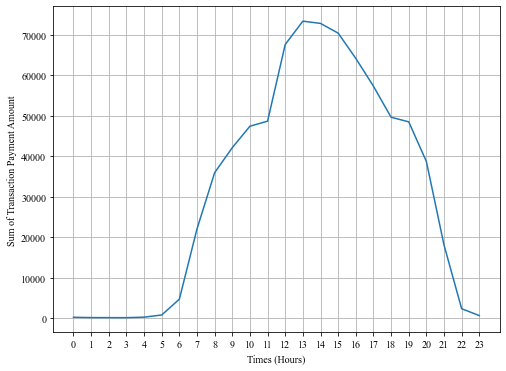

In [52]:
cat = [time for time, df in all_data.groupby(['Hour'])]

plt.figure(figsize=(8,6))
plt.plot(cat, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(cat)
plt.xlabel('Times (Hours)')
plt.ylabel('Sum of Transaction Payment Amount')
plt.grid()
plt.show()

```NOTE```
- From the picture above we get to know, peak hours of Transaction occurs at 13.00 - 15.00

#### 1.e Promo kode apa yang paling sering digunakan?

In [53]:
dfby_promocode = all_data.groupby(['Promo_code']).sum().sort_values(by='Count', ascending=False)
dfby_promocode['Count'].head(10)

Promo_code
9001    317938
1220    101166
1045     92882
1029     39202
9040     34820
9207     26616
9201     25544
9208     22386
1086     18384
9214     17895
Name: Count, dtype: int64

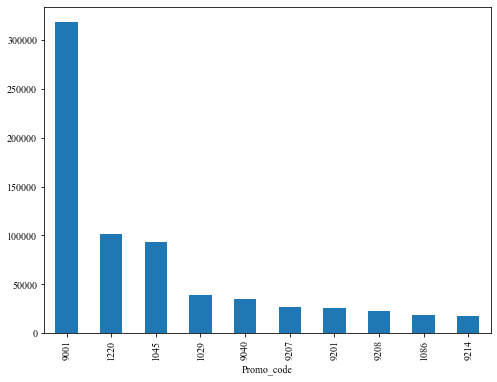

In [55]:
ax = dfby_promocode['Count'].head(10).plot.bar(figsize=(8,6))
ax.grid(False)

```NOTE```
- From the picture above we know the most used Promo code is 9001 following with 1220, 1045, 1029, and 9040

### 2. Diagnostic Analytics
- Bagaimana hubungan tren transaksi dengan tren diskon yang terjadi dalam Dataset ?
- Bagaimana hubungan tren level user dengan payment amount dan discount amount dalam dataset ?
- Bagaimana sebaran jenis transaksi yang terjadi berdasarkan kategorinya ?
- Bagaimana hubungan antara Promo kode dengan total diskon yang didapatkan ?

#### 2.a Bagaimana hubungan tren transaksi dengan tren diskon yang terjadi di Bulan Mei 2022 ?

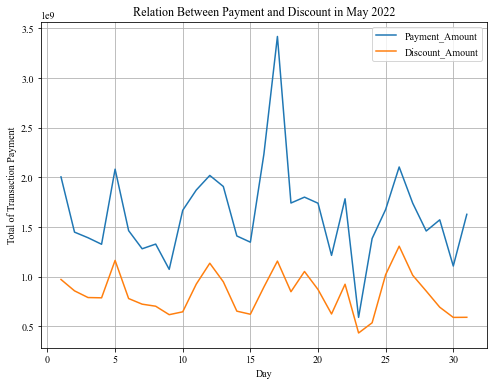

In [88]:
ax = dfby_day[['Payment_Amount', 'Discount_Amount']].plot(figsize=(8,6), title='Relation Between Payment and Discount in May 2022', ylabel='Total of Transaction Payment')
ax.grid()

```NOTE```
- Both of trend show similarity on fluctuating movement
- In that case, the graphic trend of Payment and Discount show a relation, where the higher amount of payment the higher discount you get.


#### 2.b Bagaimana hubungan tren level user dengan jumlah Payment dan Discount?

In [93]:
dfby_leveluser = all_data.groupby(['Level_user'])[['Payment_Amount', 'Discount_Amount']].sum()
dfby_leveluser

,Payment_Amount,Discount_Amount
Level_user,,
1,2.772761e+09,8.471004e+08
2,8.731967e+09,4.225557e+09
3,3.933795e+10,2.067640e+10


[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')]

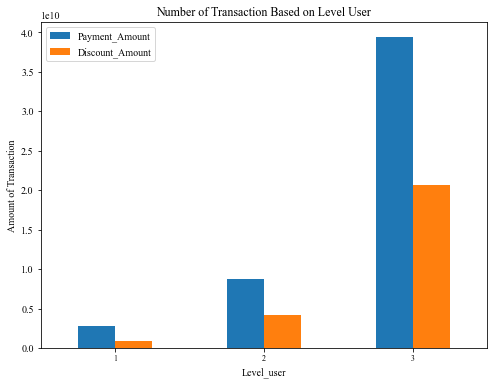

In [97]:
ax = dfby_leveluser.plot.bar(figsize=(8,6), title='Number of Transaction Based on Level User', ylabel='Amount of Transaction')
ax.set_xticklabels(dfby_leveluser.index, rotation = 'horizontal', size=8)

```NOTE```
- Higher user level has higher number of payment transactions and get bigger amount on discounts
- Higher user level has more transaction than lower user level
- Level user 3 has highest transaction payment and get more on discounts

#### 2.c  Bagaimana sebaran jenis transaksi yang terjadi berdasarkan kategorinya ?

In [56]:
# Create new column as Category
conditions = [
    (all_data['Payment_Amount'] < 0),
    (all_data['Payment_Amount'] == 0),
    (all_data['Payment_Amount'] > 0)
]

values = ['Refund', 'Failed', 'Purchase']

all_data['Category'] = np.select(conditions, values)
all_data.head()

,User_id,Transaction_id,Transaction_payment_id,Transaction_discount_id,Transaction_date,Redeem_Date,Payment_Amount,Discount_Amount,Payment_source,Level_user,Promo_code,Month,Day,Hour,Minute,Count,Category
0,7fd36377-d59f-11e8-93d5-0242ac110006,3DB5E42B-9CD4-45E0-9AAB-35054CCF3955,00000D89-BAD2-5628-A65B-3C8F4397F047,154F720B-9862-5D32-888C-084EA80F2D0E,5/9/22 11:24,5/9/22 11:24,55600.0,12400.0,1,3,9001,5,9,11,24,1,Purchase
1,7beaabd8-067e-11e9-8159-9802e614fb2e,582DCDA7-629E-4E84-9225-601BBE030C29,000023A4-AE30-524E-8851-ECF2D6EA9493,8AF4E681-B001-5284-B71C-D814D6389879,5/15/22 13:05,5/15/22 13:05,111000.0,2.0,1,3,1017,5,15,13,5,1,Purchase
2,81c9534c-d59e-11e8-93d5-0242ac110006,09C589E8-0D3F-4E1F-91C3-AA4E6BD6CDA5,0000A337-8DE9-5B9D-888C-3750620C96D9,E0B0B605-07F3-5301-A812-65124143B78C,5/6/22 13:33,5/6/22 13:33,18000.0,59000.0,1,3,9001,5,6,13,33,1,Purchase
3,07c1dd4f-d59c-11e8-93d5-0242ac110006,66EFF64F-6E22-4F97-8AE0-6316D441E10A,0000CB3B-4246-5A58-AA16-FF20B9AC60A8,98EF667A-FFAE-524E-B121-0EBF33067EFB,5/28/22 10:55,5/28/22 10:55,0.0,53000.0,1,3,9001,5,28,10,55,1,Failed
4,e63f0d4a-f424-11ea-967b-f9b86ba0bcee,7774F5E7-4A60-49A9-A359-BD3C167D8F29,0000EED4-7E0E-5F21-BABC-357D89CB040A,493EBB76-C3F2-5D80-9033-4167F04FEB12,5/15/22 16:25,5/15/22 16:25,9000.0,20000.0,2,2,9001,5,15,16,25,1,Purchase


In [57]:
dfby_category = all_data.groupby(['Category']).sum()

In [60]:
dfby_category

,Payment_Amount,Discount_Amount,Level_user,Promo_code,Month,Day,Hour,Minute,Count
Category,,,,,,,,,
Failed,0.000000e+00,6.395271e+09,343323,9.944971e+08,600760,1995583,1687618,3530781,120152
Purchase,5.124672e+10,1.877053e+10,1697843,3.459866e+09,3126210,10035490,8746588,18427586,625242
Refund,-4.040412e+08,5.832621e+08,47693,1.300620e+08,103560,327536,306156,610582,20712


```NOTE```
- There is some issue in preliminary dataset where the data in the Payment_Amount column has negative payment value
- There is also Payment_Amount that has zero payment value
- On this analysis, i will assume some criteria, following:
    - Negative amount of transaction payment considered as refund payment (negative expense)
    - Posifive amount of transaction payment considered as successfull purchased payment
    - Zero amount of transaction payment considered as failed payment

<AxesSubplot:title={'center':'Payment Transaction Category in May 2022'}, ylabel='Category'>

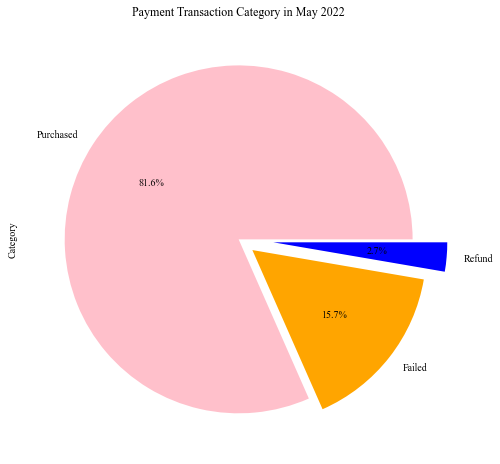

In [82]:
(all_data['Category'].value_counts().plot.pie(title='Payment Transaction Category in May 2022', colors=['pink', 'orange', 'blue'], labels=['Purchased', 'Failed', 'Refund'], autopct='%1.1f%%', figsize=(10,8), explode=(0,0.1,0.2)))

```NOTE```
- There is 81.6% Purchased payment in May 2022 with total 625242 amount of transaction payment
- There is 15.7% Failed payment in May 2022 with total 120152 amount of failed transaction
- There is 2.7% Refund payment in May 2022 with total 20712 amount of Refund

#### 2.d Bagaimana hubungan antara Promo kode dengan total diskon yang didapatkan ?

In [68]:
all_data['Kode_promo'] = all_data['Promo_code'].astype(str)

In [106]:
da_promodisc = all_data.groupby('Kode_promo')['Discount_Amount'].mean()
da_promodisc = da_promodisc.sort_values(ascending=False)
da_promodisc = da_promodisc.head(10)

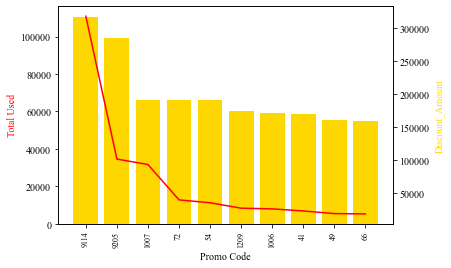

In [109]:
discounts = all_data.groupby('Kode_promo').count()['Count'].sort_values(ascending=False).head(10)
cat = da_promodisc.index
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(cat, da_promodisc, color = 'gold')
ax2.plot(cat, discounts, color = 'red')

ax1.set_xlabel('Promo Code')
ax1.set_ylabel('Total Used', color = 'red')
ax2.set_ylabel('Discount_Amount', color = 'gold')
ax1.set_xticklabels(cat, rotation = 'vertical', size=8)

fig.show()

### INSIGHT
- There are several promo codes that gives highest amount of discounts, the top Three are following:
    1. Promo Code ```9114```
    2. Promo Code ```9205```
    3. Promo Code ```1007```
    
- We recommend you to choose from the promo codes mentioned above in order to get bigger discount
- Another option to choose what promo code to use are following:
    1. Promo Code ```9001```
    2. Promo Code ```1220```    
    3. Promo Code ```1045```    
    4. Promo Code ```1029```    
    5. Promo Code ```9040```
- We reccomend the 5 promo codes above as an alternative to choose because based on the amount of customers who often get or use the promo code to be redeemed